In [1]:
# import astropy
import numpy as np
import matplotlib.pyplot as plt
# from astropy.coordinates import get_body
# from astropy.time import Time


In [4]:
from astropy.coordinates import get_body, EarthLocation, AltAz
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris
import astropy.units as u

solar_system_ephemeris.set('de432s')


<ScienceState solar_system_ephemeris: 'de432s'>

In [5]:
times = Time('2024-01-01 00:00:00') + np.arange(0, 365, 1) * u.day
location = EarthLocation(lat=40.7128*u.deg, lon=-74.0060*u.deg, height=0*u.m)


In [6]:
jupiter_positions = get_body('jupiter', times, location)


In [7]:
ra = jupiter_positions.ra.deg
dec = jupiter_positions.dec.deg
distance = jupiter_positions.distance.au


In [9]:
distance.shape

(365,)

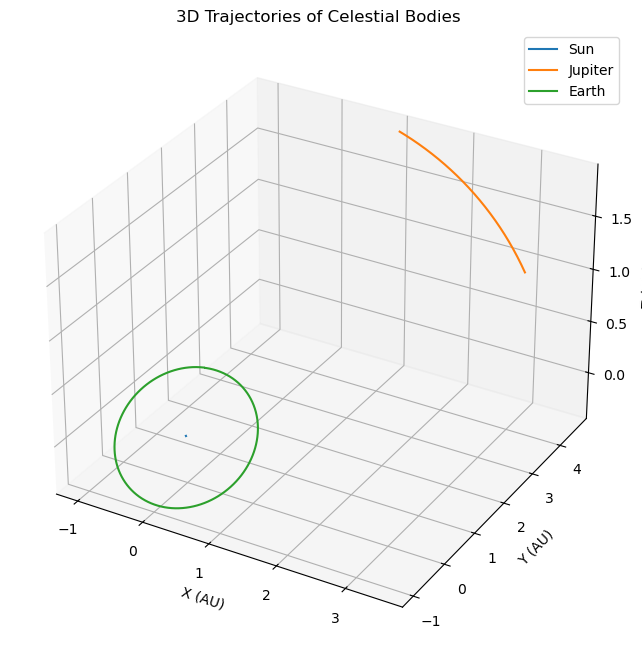

In [10]:
from astropy.coordinates import get_body_barycentric, solar_system_ephemeris
from astropy.time import Time
import astropy.units as u
from mpl_toolkits.mplot3d import Axes3D  # For 3D plots

'''
An ephemeris is a tabulated set of data that provides the positions
and velocities of celestial bodies, such as planets, comets, and satellites,
at specific times.
'''
# Set the ephemeris
solar_system_ephemeris.set('de432s')

times = Time('2024-01-01 00:00:00') + np.arange(0, 365, 1) * u.day  # time range
bodies = ['sun', 'jupiter', 'earth']  # bodies to track
positions = {body: np.array([get_body_barycentric(body, time).xyz.to(u.au).value for time in times]) 
             for body in bodies}  # (3d) positions of the bodies (wrt to solar system barycentre)

# Plot trajectories of bodies
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for body, coords in positions.items():
    x, y, z = coords.T
    ax.plot(x, y, z, label=body.capitalize())
ax.set_xlabel('X (AU)')
ax.set_ylabel('Y (AU)')
ax.set_zlabel('Z (AU)')
ax.legend()
ax.set_title("3D Trajectories of Celestial Bodies")
plt.show()

In [13]:
velocities = {
    body: np.gradient(positions[body], axis=0) / (1 * u.day).to(u.s).value for body in positions
}  # (3d) velovities estimation of the chosen bodies in 

# print(velocities[:10])
# print(type(velocities))
# print(velocities)


<class 'dict'>
{'sun': array([[ 5.64648682e-11, -7.46824288e-11, -3.29563370e-11],
       [ 5.65048561e-11, -7.46359860e-11, -3.29369218e-11],
       [ 5.65846691e-11, -7.45434413e-11, -3.28982589e-11],
       ...,
       [ 8.27063381e-11, -3.89249953e-11, -1.83532069e-11],
       [ 8.27504663e-11, -3.87921900e-11, -1.82975007e-11],
       [ 8.27723884e-11, -3.87257596e-11, -1.82696361e-11]]), 'jupiter': array([[-6.33587740e-08,  5.94154351e-08,  2.70097159e-08],
       [-6.34069805e-08,  5.93697627e-08,  2.69913128e-08],
       [-6.35033122e-08,  5.92783522e-08,  2.69544765e-08],
       ...,
       [-8.63325599e-08,  2.01426736e-08,  1.07355188e-08],
       [-8.63608012e-08,  2.00233035e-08,  1.06850409e-08],
       [-8.63748718e-08,  1.99636129e-08,  1.06597983e-08]]), 'earth': array([[-1.99119897e-07, -3.31171585e-08, -1.43493439e-08],
       [-1.98798492e-07, -3.47120925e-08, -1.50402754e-08],
       [-1.98125041e-07, -3.78978965e-08, -1.64205278e-08],
       ...,
       [-2.011085

Using astroquery to query data from JPL Horizons: high-accuracy time-series data, including positions and velocities.


In [ ]:

'''

---- Obtaining IDs ----
If you need to verify these IDs or find IDs for other objects, you can:
Use the Horizons web interface and search for the object name.
Utilise the Horizons Lookup API to retrieve object information.
Use the astroquery library in Python, which provides a convenient interface to JPL Horizons.
For example, using the Horizons Lookup API:
https://ssd.jpl.nasa.gov/api/horizons_lookup.api?sstr=saturn

The solar system barycentre is 0: {"spkid":"0","name":"Solar System Barycenter","pdes":null,"alias":["SSB"]}

---- Regarding planet's "barycentre" ----
The planet is the object, and the barycentre is the weighted centre of mass of the planet and everything that orbits it (eg moons).


https://ssd.jpl.nasa.gov/api/horizons_lookup.api?sstr=barycenter:

{"signature":{"source":"NASA/JPL Horizons Lookup API","version":"1.0"},
 "count":10,"result":[{"spkid":"0","name":"Solar System Barycenter","pdes":null,"alias":["SSB"]},
                      {"pdes":null,"spkid":"1","name":"Mercury Barycenter","alias":[]},
                      {"name":"Venus Barycenter","spkid":"2","pdes":null,"alias":[]},
                      {"alias":["EMB"],"pdes":null,"name":"Earth-Moon Barycenter","spkid":"3"},
                      {"alias":[],"name":"Mars Barycenter","spkid":"4","pdes":null},
                      {"alias":[],"spkid":"5","name":"Jupiter Barycenter","pdes":null},
                      {"alias":[],"name":"Saturn Barycenter","spkid":"6","pdes":null},
                      {"spkid":"7","name":"Uranus Barycenter","pdes":null,"alias":[]},
                      {"name":"Neptune Barycenter","spkid":"8","pdes":null,"alias":[]},
                      {"pdes":null,"name":"Pluto Barycenter","spkid":"9","alias":[]}]}
'''

In [ ]:
def spherical_to_cartesian(RA, DEC, r):
    """
    Convert spherical coordinates (RA, DEC, r) to Cartesian coordinates (x, y, z).
    parameters:
    RA (array-like): right Ascension in radians
    DEC (array-like): declination in radians
    r (array-like): radial distance (distance from observer/sun)
    returns:
    tuple: cartesian coordinates (x, y, z).
    """
    x = r * np.cos(DEC) * np.cos(RA)
    y = r * np.cos(DEC) * np.sin(RA)
    z = r * np.sin(DEC)
    return x, y, z

# Convert to cartesian coordinates
# x, y, z = spherical_to_cartesian(RA, DEC, r)
# vx, vy, vz = np.gradient([x, y, z], axis=0)


In [25]:
from astroquery.jplhorizons import Horizons

bodies_names = ['Jupiter', 'Sun', 'Earth', 'Saturn']   # bodies to track
bodies = ['599', '10', '399', '699']   # bodies to track

# Query from ephemeris
trajectories = {}
for body in bodies:
    obj = Horizons(id=body, location='@0',
                   epochs={'start': '2024-01-01', 'stop': '2024-12-31', 'step': '1d'})
    # eph = obj.ephemerides()
    # print(eph.columns)  # column names
    # trajectories[body] = {
    #     'x': eph['x'], 'y': eph['y'], 'z': eph['z'],
    #     'vx': eph['vx'], 'vy': eph['vy'], 'vz': eph['vz']
    # }
    # trajectories[body] = {
    #     'RA': eph['RA'],                  # right Ascension
    #     'DEC': eph['DEC'],                # declination
    #     'r': eph['r'],                    # radial distance
    #     'r_rate': eph['r_rate'],          # radial velocity (change in r)
    #     'delta': eph['delta'],            # distance to the target
    #     'delta_rate': eph['delta_rate'],  # rate of change of distance
    #     # 'vel_sun': eph['vel_sun'],        # velocity relative to the sun
    #     # 'vel_obs': eph['vel_obs'],        # velocity relative to the observer
    # }

    vecs = obj.vectors()
    trajectories[body] = {
        'x': vecs['x'], 'y': vecs['y'], 'z': vecs['z'],
        'vx': vecs['vx'], 'vy': vecs['vy'], 'vz': vecs['vz']
    }    


Jupiter
Sun
Earth
Saturn


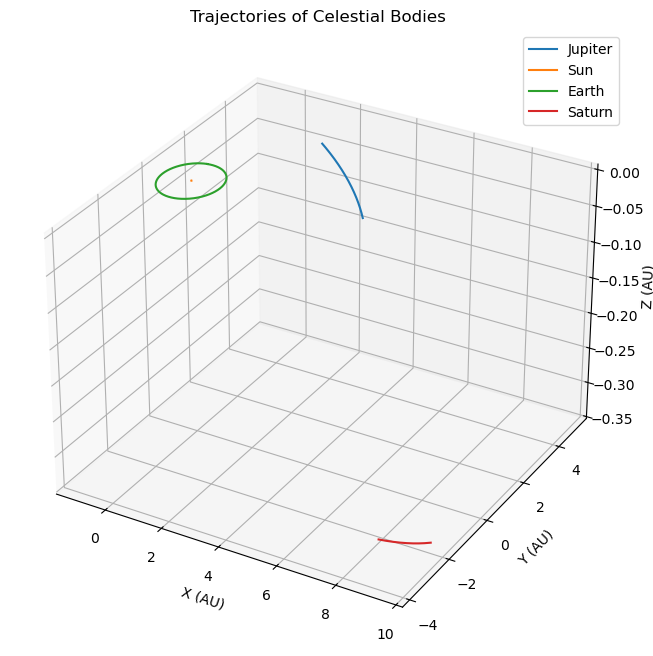

In [28]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot bodies
for (body, data), body_name in zip(trajectories.items(), bodies_names):
    # print(body_name)
    ax.plot(data['x'], data['y'], data['z'], label=body_name)
ax.set_xlabel('X (AU)')
ax.set_ylabel('Y (AU)')
ax.set_zlabel('Z (AU)')
ax.set_title('trajectories of celestial bodies')
ax.legend()

plt.show()